In [13]:
import shap
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Reference TreeExplainer via the shap namespace to avoid NameError
# Use `shap.TreeExplainer` or import explicitly: `from shap import TreeExplainer`
print("TreeExplainer available as:", shap.TreeExplainer)


TreeExplainer available as: <class 'shap.explainers._tree.TreeExplainer'>


matplotlib version: 3.10.8
Reloaded shap module to pick up plotting support.


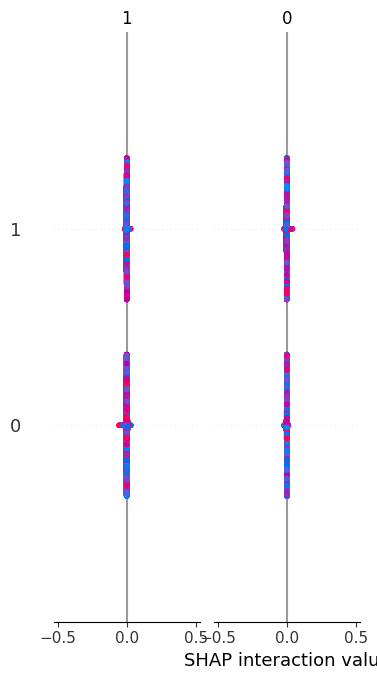

In [17]:
# Demo: if no pre-trained `model` is available, train a small RandomForest here for a SHAP demo.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load processed features and target (same files used in modeling notebook)
X = pd.read_csv("../data/processed/fraud_features.csv")
y = pd.read_csv("../data/processed/fraud_target.csv").squeeze()

# Small train/test split to keep runtime reasonable for a demo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

rf_demo = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_demo.fit(X_train, y_train)

# Ensure matplotlib is installed and available for SHAP plotting
import importlib
import subprocess
import sys
try:
    import matplotlib
except Exception:
    print("matplotlib not found; installing via pip...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])  # may take a minute
    importlib.invalidate_caches()
    import matplotlib

# Import pyplot and print version
import matplotlib.pyplot as plt
print("matplotlib version:", matplotlib.__version__)

# If shap was imported earlier (before matplotlib was available), reload it so
# it re-detects plotting backends and enables plotting features.
try:
    importlib.reload(shap)
    print("Reloaded shap module to pick up plotting support.")
except Exception as e:
    print("Warning: failed to reload shap:", e)

# Configure notebook backend if running inside IPython/Jupyter
try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except Exception:
    pass

# Use TreeExplainer via shap namespace and compute explanations
explainer = shap.TreeExplainer(rf_demo)
shap_values = explainer(X_test)

# Plot feature importance summary (bar). If plotting fails, print the error.
try:
    shap.summary_plot(shap_values, X_test, plot_type="bar")
except Exception as e:
    print("SHAP plotting failed:", e)


Using model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


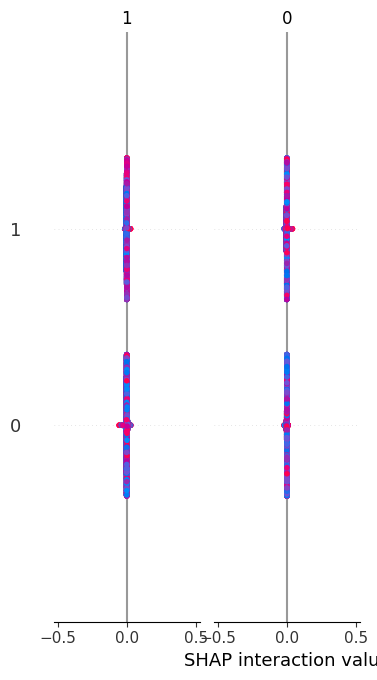

In [19]:
# Select an available model: prefer `model` (if defined), otherwise use the demo `rf_demo`.
try:
    model_to_use = model
except NameError:
    model_to_use = rf_demo
print("Using model:", type(model_to_use))

# Compute SHAP explanations and plot safely
explainer = shap.TreeExplainer(model_to_use)
shap_values = explainer(X_test)

try:
    shap.summary_plot(shap_values, X_test, plot_type="bar")
except Exception as e:
    print("SHAP plotting failed:", e)